### 1-Read Dataset

In [2]:
# import libarary
import pandas as pd
import numpy as np 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read data
data=pd.read_csv(r"D:\ML project & tasks\car_evaluation.csv")

In [5]:
# display first 5 row of data
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### 2-Data Exploration

In [7]:
# display shape of data
data.shape

(1727, 7)

In [8]:
# show information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# display name of columns
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [10]:
# change name of columns
cols_name=['buying','maint','doors','person','lug_boot','safety','class']

In [11]:
data.columns=cols_name

In [12]:
data.head()

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
for i in data.columns:
    print(f'column name : {i}')
    print(data[i].value_counts())
    print("--"*40)

column name : buying
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : maint
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : doors
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : person
person
4       576
more    576
2       575
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : lug_boot
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
--------------------------------------------------------------------------------
column name : safety
safety
med     576
high    576
low     575
Name: count, dtype: int64
----

In [14]:
for i in cols_name:
    print(f"column name : {i}")
    print(data[i].unique())
    print('--'*40)

column name : buying
['vhigh' 'high' 'med' 'low']
--------------------------------------------------------------------------------
column name : maint
['vhigh' 'high' 'med' 'low']
--------------------------------------------------------------------------------
column name : doors
['2' '3' '4' '5more']
--------------------------------------------------------------------------------
column name : person
['2' '4' 'more']
--------------------------------------------------------------------------------
column name : lug_boot
['small' 'med' 'big']
--------------------------------------------------------------------------------
column name : safety
['med' 'high' 'low']
--------------------------------------------------------------------------------
column name : class
['unacc' 'acc' 'vgood' 'good']
--------------------------------------------------------------------------------


In [15]:
# check missing values
data.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
# check duplicated
data.duplicated().sum()

0

In [17]:
# describe of data
data.describe()

,buying,maint,doors,person,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### 3-Data visualization

In [19]:
# import libarary
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

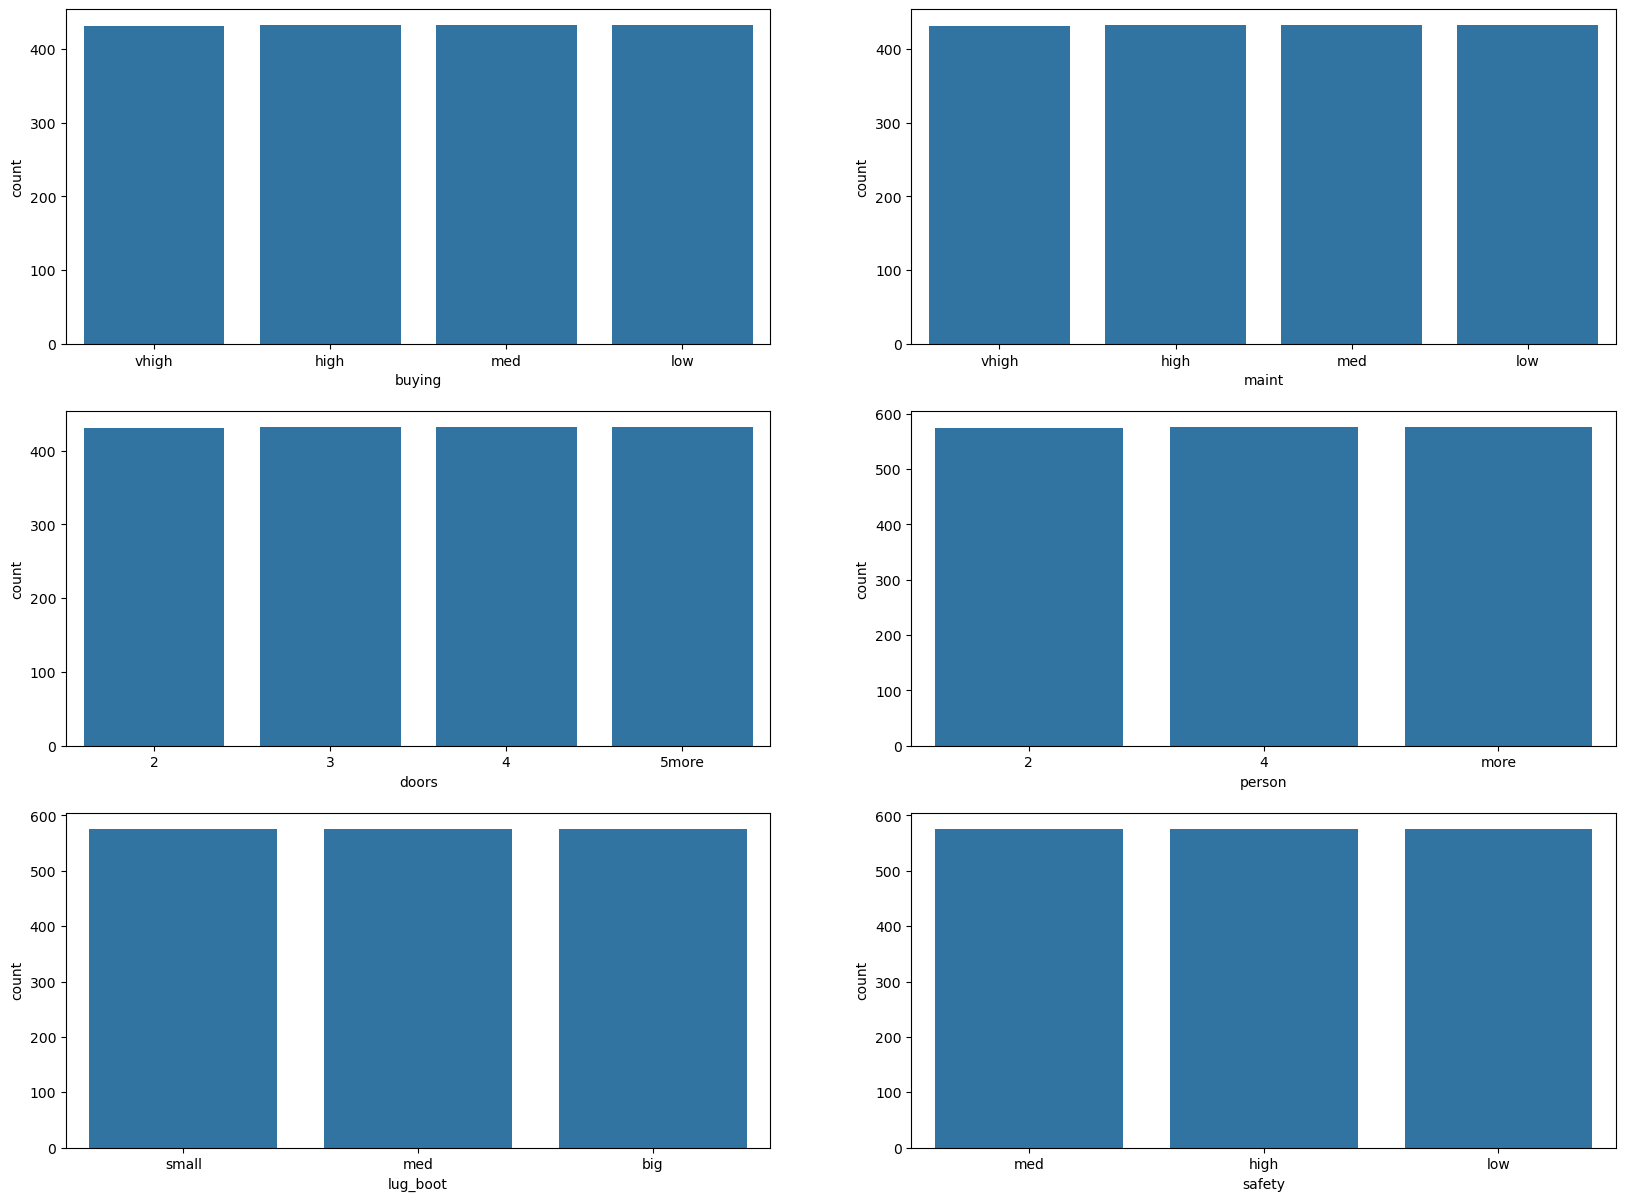

In [20]:
# count plot
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.countplot(x=data['buying'])

plt.subplot(4,2,2)
sns.countplot(x=data['maint'])

plt.subplot(4,2,3)
sns.countplot(x=data['doors'])

plt.subplot(4,2,4)
sns.countplot(x=data['person'])

plt.subplot(4,2,5)
sns.countplot(x=data['lug_boot'])

plt.subplot(4,2,6)
sns.countplot(x=data['safety'])

plt.show()


### 4-Data Preprocessing

In [22]:
# split data into feature(x) and label(y)
x=data.drop(['class'],axis=1)
y=data['class']

In [23]:
# split data into data_train and data_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,shuffle=True,random_state=42)

In [24]:
# encoding data
import category_encoders as ce

In [25]:
encoder=ce.OrdinalEncoder()

In [26]:
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [27]:
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [28]:
x_train.head()

,buying,maint,doors,person,lug_boot,safety
1119,1,1,1,1,1,1
999,1,2,1,2,2,1
1503,2,2,2,3,2,1
1201,1,3,3,1,1,2
1354,2,4,4,2,1,2


In [29]:
y_train.head()

,class
1119,1
999,2
1503,1
1201,3
1354,2


### 5-Build Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# calling
knn=KNeighborsClassifier()

In [33]:
# fit model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
# predict model
y_pred=knn.predict(x_test)

In [35]:
print('first 10 value of y predict =',y_pred[:10])
print(' ')
print('first 10 value of y actual =',y_test[:10])

first 10 value of y predict = [1 2 2 2 1 2 2 1 2 2]
 
first 10 value of y actual =       class
1695      3
908       2
524       2
1080      2
592       1
169       2
929       2
388       1
1496      2
526       2


In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.78      0.72        77
           2       0.92      0.96      0.94       242
           3       0.33      0.07      0.12        14
           4       0.50      0.08      0.13        13

    accuracy                           0.85       346
   macro avg       0.61      0.47      0.48       346
weighted avg       0.83      0.85      0.83       346



In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# test score
y_pred_test=knn.predict(x_test)
print('test score =',accuracy_score(y_test,y_pred_test))

test score = 0.8497109826589595


In [40]:
# train score
y_pred_train=knn.predict(x_train)
print('test score =',accuracy_score(y_train,y_pred_train))

test score = 0.9167270094134685


In [41]:
cm=confusion_matrix(y_test,y_pred)

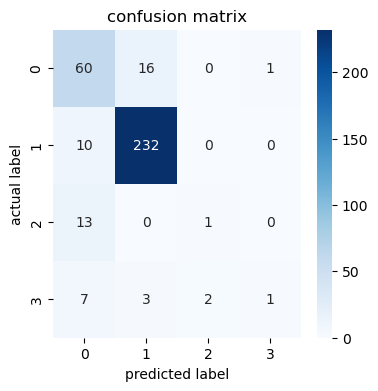

In [42]:
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [43]:
y_test.value_counts()

class
2        242
1         77
3         14
4         13
Name: count, dtype: int64

In [44]:
# use logisticRegression of data
from sklearn.linear_model import LogisticRegression

In [45]:
# calling model
log_model=LogisticRegression()

In [46]:
# fit model
log_model.fit(x_train,y_train)

LogisticRegression()

In [47]:
# predict model
y_pred_log=log_model.predict(x_test)

In [48]:
print('first 10 value of y predict =',y_pred_log[:10])
print(' ')
print('first 10 value of y actual =',y_test[:10])

first 10 value of y predict = [2 2 2 1 2 2 2 2 2 2]
 
first 10 value of y actual =       class
1695      3
908       2
524       2
1080      2
592       1
169       2
929       2
388       1
1496      2
526       2


In [49]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           1       0.36      0.22      0.27        77
           2       0.73      0.90      0.81       242
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        13

    accuracy                           0.68       346
   macro avg       0.27      0.28      0.27       346
weighted avg       0.59      0.68      0.62       346



In [50]:
# use naive bayes model
from sklearn.naive_bayes import GaussianNB

In [51]:
# calling model
NB_model=GaussianNB()

In [52]:
# fit model
NB_model.fit(x_train,y_train)

GaussianNB()

In [53]:
# predict model
y_pred_NB=NB_model.predict(x_test)

In [54]:
print('first 10 value of y predict =',y_pred_NB[:10])
print(' ')
print('first 10 value of y actual =',y_test[:10])

first 10 value of y predict = [2 2 2 1 4 2 2 2 2 4]
 
first 10 value of y actual =       class
1695      3
908       2
524       2
1080      2
592       1
169       2
929       2
388       1
1496      2
526       2


In [55]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           1       0.49      0.23      0.32        77
           2       0.87      0.79      0.83       242
           3       0.00      0.00      0.00        14
           4       0.15      1.00      0.25        13

    accuracy                           0.64       346
   macro avg       0.38      0.51      0.35       346
weighted avg       0.72      0.64      0.66       346



In [56]:
score = []
for i in range(1,20):
    #model
    knn_model = KNeighborsClassifier(n_neighbors = i)

    #fit
    knn_model.fit(x_train, y_train)
    score.append(knn_model.score(x_test, y_test))

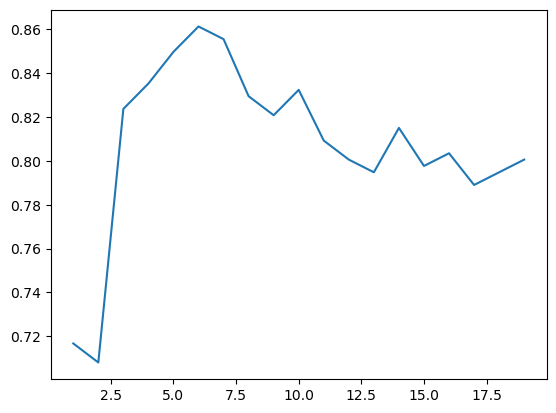

In [57]:
plt.plot(range(1,20), score)

In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 6, p = 1)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.81      0.73        77
           2       0.93      0.95      0.94       242
           3       0.50      0.07      0.12        14
           4       1.00      0.23      0.38        13

    accuracy                           0.86       346
   macro avg       0.78      0.52      0.54       346
weighted avg       0.86      0.86      0.84       346



In [60]:
# use grid search
from sklearn.model_selection import GridSearchCV

In [61]:
# calling
knn=KNeighborsClassifier()

params={
    'n_neighbors': list(range(1,20)),
    'p':[1,2] #1: manhattan 2:euclidien
}

In [62]:
grid=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='accuracy')

In [63]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]},
             scoring='accuracy')

In [64]:
grid.best_params_

{'n_neighbors': 5, 'p': 2}

In [65]:
grid.best_score_

0.8428687280908281

In [66]:
# use best parameter on knn model
knn_b=KNeighborsClassifier(n_neighbors= 5, p= 2)
knn_b.fit(x_train,y_train) 

KNeighborsClassifier()

In [67]:
y_pred_b = knn_b.predict(x_test)

In [68]:
print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           1       0.67      0.78      0.72        77
           2       0.92      0.96      0.94       242
           3       0.33      0.07      0.12        14
           4       0.50      0.08      0.13        13

    accuracy                           0.85       346
   macro avg       0.61      0.47      0.48       346
weighted avg       0.83      0.85      0.83       346



In [69]:
lr_model = LogisticRegression()
param ={
    "max_iter" : list(range(1,50)),
    "penalty" : ['l1', 'l2']  
}

In [70]:
gs = GridSearchCV(lr_model, param, cv = 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                      14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                      24, 25, 26, 27, 28, 29, 30, ...],
                         'penalty': ['l1', 'l2']})

In [71]:
gs.best_params_

{'max_iter': 16, 'penalty': 'l2'}

In [72]:
gs.best_score_

0.7074556584523621

In [73]:
# use best parameter on logistic model
log_b=LogisticRegression(max_iter= 16, penalty= 'l2')
log_b.fit(x_train,y_train) 

LogisticRegression(max_iter=16)

In [74]:
y_pred_lb = log_b.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred_lb))

              precision    recall  f1-score   support

           1       0.32      0.10      0.16        77
           2       0.71      0.94      0.81       242
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        13

    accuracy                           0.68       346
   macro avg       0.26      0.26      0.24       346
weighted avg       0.57      0.68      0.60       346

